In [3]:
import os 
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [25]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0
             ,DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))

                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) #convert scalar value to one hot vector.
                    
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except:
                    pass
                    print("Failed image")
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats: ",self.catcount)
        print("Dogs: ",self.dogcount)
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|██████████| 10/10 [00:00<00:00, 390.32it/s]

PetImages/Cat
PetImages/Dog
Cats:  10
Dogs:  10



/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [28]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))
print(training_data[0])

20
[array([[221, 201, 191, ..., 161, 147, 156],
       [218, 208, 192, ..., 122, 171, 148],
       [218, 209, 213, ..., 174, 174, 151],
       ...,
       [173, 172, 168, ..., 174, 174, 168],
       [166, 168, 167, ..., 171, 171, 169],
       [164, 171, 166, ..., 170, 166, 170]], dtype=uint8)
 array([0., 1.])]


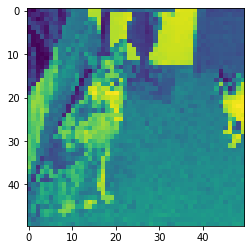

In [29]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0])